In [ ]:
import time
import tracemalloc

# Búsqueda Secuencial
def busquedaSecuencial(arr, x):
    for i, item in enumerate(arr):
        if item == x:
            return i
    return -1

# Búsqueda Binaria
def busquedaBinaria(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1  
    return -1

# Bubble Sort
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# Merge Sort
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2 
        L = arr[:mid]
        R = arr[mid:]

        mergeSort(L)
        mergeSort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Tamaños para probar cada algoritmo
input_sizes = [1000,10000,15000,20000]

# funcion para medir tiempo de ejecución y uso de memoria
def medidor(algorithm, data, is_search=False, target=None):
    # iniciar medicion de memoria y cronometro
    tracemalloc.start()
    start_time = time.time()
    print(f"Tamaños: {len(data)} con {algorithm.__name__}")

    # ejecutar algorimo dependiedo si es de busqueda u odenacion
    if is_search:
        result = algorithm(data, target)  # busqueda
    else:
        result = algorithm(data.copy())   # ordenacion

    # detener y obtener el cronometro y el uso de memoria
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    # Calcula el tiempo de ejecución y el uso de memoria
    execution_time = end_time - start_time
    memory = peak / 1024
    return execution_time, memory

resultados = []

# probar cada algoritmo con las diferentes entradas
for size in input_sizes:
    # lista vacia con cada rango
    arr = list(range(size))
    target = size - 1  # busca el ultimo elemento

    # Búsqueda Secuencial
    time_ls, mem_ls = medidor(busquedaSecuencial, arr, is_search=True, target=target)
    # Búsqueda Binaria
    time_bs, mem_bs = medidor(busquedaBinaria, arr, is_search=True, target=target)
    # Merge Sort
    time_merge, mem_merge = medidor(mergeSort, arr)
    # Bubble Sort
    time_bubble, mem_bubble = medidor(bubbleSort, arr)

    # resultados
    resultados.append({
        'size': size,
        'busquedaSecuencial': (time_ls, mem_ls),
        'busquedaBinaria': (time_bs, mem_bs),
        'mergeSort': (time_merge, mem_merge),
        'bubbleSort': (time_bubble, mem_bubble)
    })

# Imprime los resultados de las pruebas
print("\n--------------------------- RESULTADOS ---------------------------")
for result in resultados:
    print(f"\nTamaño de entrada: {result['size']}")
    print(f"Linear Search -> Tiempo: {result['busquedaSecuencial'][0]:.6f}s, Memoria: {result['busquedaSecuencial'][1]:.2f} KB")
    print(f"Binary Search -> Tiempo: {result['busquedaBinaria'][0]:.6f}s, Memoria: {result['busquedaBinaria'][1]:.2f} KB")
    print(f"Merge Sort -> Tiempo: {result['mergeSort'][0]:.6f}s, Memoria: {result['mergeSort'][1]:.2f} KB")
    print(f"Bubble Sort -> Tiempo: {result['bubbleSort'][0]:.6f}s, Memoria: {result['bubbleSort'][1]:.2f} KB")


Tamaños: 1000 con linear_search
Tamaños: 1000 con binary_search
Tamaños: 1000 con merge_sort
Tamaños: 1000 con bubble_sort
Tamaños: 10000 con linear_search
Tamaños: 10000 con binary_search
Tamaños: 10000 con merge_sort
Tamaños: 10000 con bubble_sort
Tamaños: 15000 con linear_search
Tamaños: 15000 con binary_search
Tamaños: 15000 con merge_sort
Tamaños: 15000 con bubble_sort
Tamaños: 20000 con linear_search
Tamaños: 20000 con binary_search
Tamaños: 20000 con merge_sort
Tamaños: 20000 con bubble_sort
--------------------------- RESULTADOS ---------------------------

Tamaño de entrada: 1000
Linear Search -> Tiempo: 0.000677s, Memoria: 1016.21 KB
Binary Search -> Tiempo: 0.000091s, Memoria: 1.17 KB
Merge Sort -> Tiempo: 0.008817s, Memoria: 25.18 KB
Bubble Sort -> Tiempo: 0.434636s, Memoria: 11.08 KB

Tamaño de entrada: 10000
Linear Search -> Tiempo: 0.006569s, Memoria: 2.38 KB
Binary Search -> Tiempo: 0.000083s, Memoria: 1.17 KB
Merge Sort -> Tiempo: 0.257246s, Memoria: 235.06 KB
Bubble S

In [ ]:
# ¿Cómo varían el tiempo de ejecución y el uso de memoria a medida que aumenta el tamaño de la entrada?
#     En la busqueda lineal sube un poco, en la busqueda binaria tarda mas o menos lo mismo, en el merge sort va subiendo y en el bubble sort parece que se triplica el tiempo que tarda.
#     Respecto a memoria merge sort es el que mas ocupa por delante de bubble sort

# ¿Qué algoritmo resulta más eficiente en tiempo y cuál consume menos memoria? ¿Por qué?
#     El mejor en tiempo y memoria es Binary Search ya que es el mejor que se puede usar a la hora de hacer una busqueda en arreglos ordenados

# ¿Se corresponden los resultados experimentales con la complejidad teórica de cada algoritmo?
#     Si

Tamaños: 1000 con busquedaSecuencial
Tamaños: 1000 con busquedaBinaria
Tamaños: 1000 con mergeSort
Tamaños: 1000 con bubbleSort
Tamaños: 10000 con busquedaSecuencial
Tamaños: 10000 con busquedaBinaria
Tamaños: 10000 con mergeSort
Tamaños: 10000 con bubbleSort
Tamaños: 15000 con busquedaSecuencial
Tamaños: 15000 con busquedaBinaria
Tamaños: 15000 con mergeSort
Tamaños: 15000 con bubbleSort
Tamaños: 20000 con busquedaSecuencial
Tamaños: 20000 con busquedaBinaria
Tamaños: 20000 con mergeSort
Tamaños: 20000 con bubbleSort


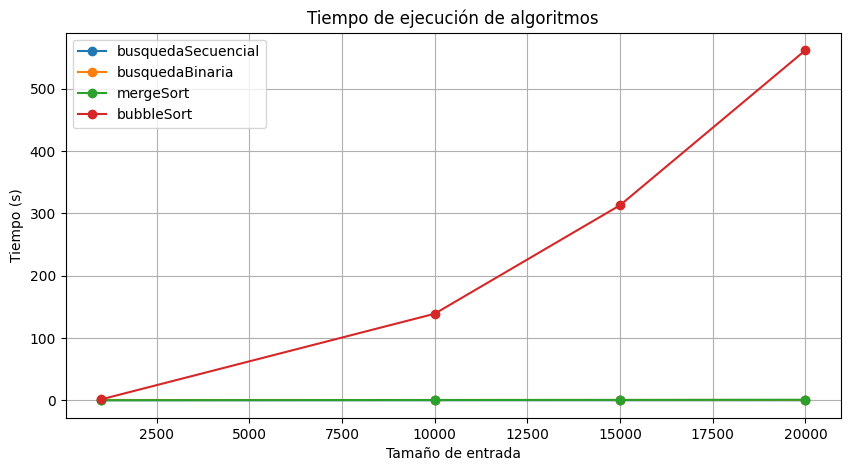

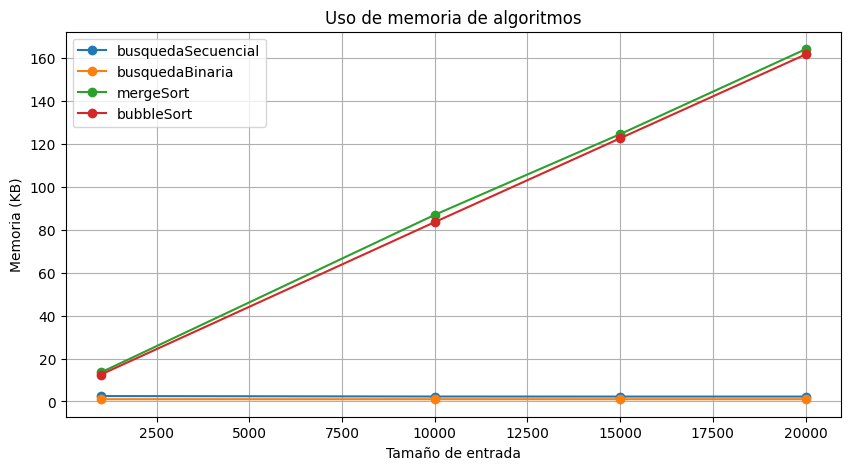

In [1]:
import time
import numpy as np
import tracemalloc
import matplotlib.pyplot as plt

# Búsqueda Secuencial
def busquedaSecuencial(arr, x):
    for i, item in enumerate(arr):
        if item == x:
            return i
    return -1

# Búsqueda Binaria
def busquedaBinaria(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1  
    return -1

# Bubble Sort
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# Merge Sort
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2 
        L = arr[:mid]
        R = arr[mid:]

        mergeSort(L)
        mergeSort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Tamaños para probar cada algoritmo
tamanyos = [1000,10000,15000,20000]

# funcion para medir tiempo de ejecución y uso de memoria
def medidor(algorithm, data, is_search=False, target=None):
    # iniciar medicion de memoria y cronometro
    tracemalloc.start()
    start_time = time.time()
    print(f"Tamaños: {len(data)} con {algorithm.__name__}")

    # ejecutar algorimo dependiedo si es de busqueda u odenacion
    if is_search:
        result = algorithm(data, target)  # busqueda
    else:
        result = algorithm(data.copy())   # ordenacion

    # detener y obtener el cronometro y el uso de memoria
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    # Calcula el tiempo de ejecución y el uso de memoria
    execution_time = end_time - start_time
    memory = peak / 1024
    return execution_time, memory

resultados = []

# probar cada algoritmo con las diferentes entradas
for size in tamanyos:
    # lista vacia con cada rango
    # arr = list(range(size))
    arr = np.random.rand(size)
    target = size - 1  # busca el ultimo elemento

    # Búsqueda Secuencial
    time_ls, mem_ls = medidor(busquedaSecuencial, arr, is_search=True, target=target)
    # Búsqueda Binaria
    time_bs, mem_bs = medidor(busquedaBinaria, arr, is_search=True, target=target)
    # Merge Sort
    time_merge, mem_merge = medidor(mergeSort, arr)
    # Bubble Sort
    time_bubble, mem_bubble = medidor(bubbleSort, arr)

    # resultados
    resultados.append({
        'size': size,
        'busquedaSecuencial': (time_ls, mem_ls),
        'busquedaBinaria': (time_bs, mem_bs),
        'mergeSort': (time_merge, mem_merge),
        'bubbleSort': (time_bubble, mem_bubble)
    })

# Graficar resultados
def plot_results(resultados, metric_index, title, ylabel):
    sizes = [r['size'] for r in resultados]
    algorithms = ['busquedaSecuencial', 'busquedaBinaria', 'mergeSort', 'bubbleSort']
    
    plt.figure(figsize=(10, 5))
    for alg in algorithms:
        values = [r[alg][metric_index] for r in resultados]
        plt.plot(sizes, values, marker='o', label=alg)
    
    plt.xlabel("Tamaño de entrada")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar tiempos de ejecución
plot_results(resultados, 0, "Tiempo de ejecución de algoritmos", "Tiempo (s)")
# Graficar uso de memoria
plot_results(resultados, 1, "Uso de memoria de algoritmos", "Memoria (KB)")


In [2]:
import pickle

 # resultados
    # resultados.append({
    #     'size': size,
    #     'busquedaSecuencial': (time_ls, mem_ls),
    #     'busquedaBinaria': (time_bs, mem_bs),
    #     'mergeSort': (time_merge, mem_merge),
    #     'bubbleSort': (time_bubble, mem_bubble)
    # })
# Variable que deseas guardar
mi_variable = resultados

# Abre el archivo en modo binario para escritura
with open('mi_variable.pkl', 'wb') as archivo:
    pickle.dump(mi_variable, archivo)
